In [1]:
#Define Imports
import numpy 
import pandas as pd
from pandas import read_csv
%matplotlib inline

In [59]:
# load the dataset 
df = pd.read_csv("DataNVM-filtered-no-outliers.csv") 
dataset = df.values


#split data into X and Y variables:
X = dataset[:,0:26]
Y = dataset[:,27]

X_table = dataset[0:20,0:26]
Y_table = dataset[0:20,27]

df.head() #verifying that we could read the data correctly

,size,typeapartment,typeterraced,typesemidetached,typedetached,canalhouse,rooms,balconyroofterrace,noparking,parking,...,constryear_15001905,constryear_19061930,constryear_19311944,constryear_19451959,constryear_19601970,constryear_19711980,constryear_19811990,constryear_19912000,constryear_above2001,log_price
0,410,0,0,0,1,0,10,0,0,1,...,0,1,0,0,0,0,0,0,0,15.319588
1,375,0,0,1,0,0,13,1,0,1,...,0,1,0,0,0,0,0,0,0,15.201805
2,370,0,0,0,1,0,9,1,0,1,...,0,0,1,0,0,0,0,0,0,15.110238
3,440,0,0,0,1,0,12,1,1,0,...,1,0,0,0,0,0,0,0,0,15.103365
4,360,0,1,0,0,0,7,1,1,0,...,1,0,0,0,0,0,0,0,0,14.914123


In [39]:
print(X)

print(Y)

print(X_table)
print(Y_table)

[[410.   0.   0. ...   0.   0.   0.]
 [375.   0.   0. ...   0.   0.   0.]
 [370.   0.   0. ...   0.   0.   0.]
 ...
 [ 35.   1.   0. ...   0.   1.   0.]
 [ 30.   1.   0. ...   0.   1.   0.]
 [ 33.   1.   0. ...   0.   1.   0.]]
[15.31958795 15.20180492 15.11023773 ... 11.00209984 11.00209984
 11.00209984]
[[410.   0.   0.   0.   1.   0.  10.   0.   0.   1.   0.   0.   0.   1.
    0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [375.   0.   0.   1.   0.   0.  13.   1.   0.   1.   0.   1.   1.   0.
    1.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.]
 [370.   0.   0.   0.   1.   0.   9.   1.   0.   1.   0.   1.   1.   0.
    1.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [440.   0.   0.   0.   1.   0.  12.   1.   1.   0.   0.   0.   1.   0.
    1.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [360.   0.   1.   0.   0.   0.   7.   1.   1.   0.   0.   0.   1.   1.
    1.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [350.   0.   0.  

In [4]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler
#Import for splitting data
from sklearn.model_selection import train_test_split



In [5]:
#Importing Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)

#prediction
y_pred = lr.predict(X)

from sklearn.metrics import accuracy_score

#accuracy_score(Y, y_pred)

#Compute the MAE
from sklearn.metrics import mean_absolute_error
print("This is the MAE:")
print(mean_absolute_error(Y, y_pred))

#Compute the MSE
from sklearn.metrics import mean_squared_error
print("This is the MSE:")
print(mean_squared_error(Y, y_pred))

#Compute the RMSE
print("The Following is the RMSE:")
print(numpy.sqrt(mean_squared_error(Y, y_pred)))

#Compute the R^2 Score
from sklearn.metrics import r2_score
print("The Following is the R^2 Score:")
print(r2_score(Y,y_pred))

This is the MAE:
0.1857251692229057
This is the MSE:
0.05593308395650694
The Following is the RMSE:
0.23650176311500712
The Following is the R^2 Score:
0.7545459816728723


In [6]:
lr.coef_

array([ 9.12070399e-03, -8.40303623e+11, -8.40303623e+11, -8.40303623e+11,
       -8.40303623e+11,  9.94400053e-02,  1.32897305e-02,  1.33244356e-04,
       -4.21489067e+10, -4.21489067e+10,  4.91005005e-02,  8.93628395e-02,
        6.79687575e-02,  1.03156901e-01,  8.44059632e-02, -1.20955040e-02,
        1.15195542e-01,  5.55169809e-02,  2.00125909e-01,  8.56166893e-02,
        1.23403550e-02, -1.03743068e-01, -2.51913671e-01, -2.56804449e-01,
       -1.70420418e-01, -8.77939441e-03])

In [7]:
lr.intercept_

882452529813.4664

# Neural Network Part

In [8]:
#Define Imports
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


#graphings
import matplotlib.pyplot as plt

#Scalers
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler


#Scaling X inputs
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
scaler2 = MinMaxScaler(feature_range=(-1,1))
Xscaled2 = scaler.fit_transform(X)

Using TensorFlow backend.


In [9]:
#plot regression chart
# Regression chart function
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Epoch 00009: early stopping
Score (RMSE): 0.2396191310935969


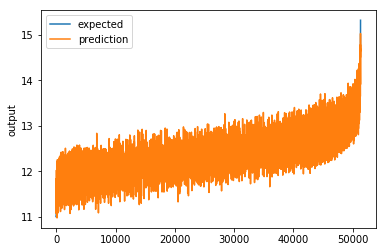

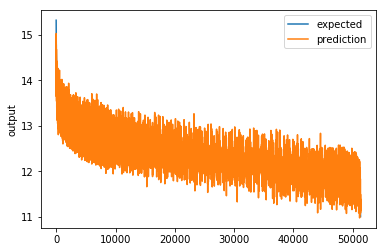

In [10]:
model = Sequential()
model.add(Dense(40, input_dim=26, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'elu'))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weightsNew2.hdf5", verbose=0, save_best_only=True) # save best model
model.fit(X,Y,validation_data=(X,Y),callbacks=[monitor,checkpointer],verbose=0,epochs=1000)
model.load_weights('best_weightsNew2.hdf5') # load weights from best model

# Predict and measure RMSE
y_predNN = model.predict(X)
score = numpy.sqrt(metrics.mean_squared_error(y_predNN,Y))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(y_predNN.flatten(),Y)
chart_regression(y_predNN.flatten(),Y,sort=False)




In [11]:
#Scores for NN model

#Compute the MAE
from sklearn.metrics import mean_absolute_error
print("This is the MAE:")
print(mean_absolute_error(Y, y_predNN))

#Compute the MSE
from sklearn.metrics import mean_squared_error
print("This is the MSE:")
print(mean_squared_error(Y, y_predNN))

#Compute the RMSE
print("The Following is the RMSE:")
print(numpy.sqrt(mean_squared_error(Y, y_predNN)))

#Compute the R^2 Score
from sklearn.metrics import r2_score
print("The Following is the R^2 Score:")
print(r2_score(Y,y_predNN))

This is the MAE:
0.18765845951206295
This is the MSE:
0.05741732798605038
The Following is the RMSE:
0.2396191310935969
The Following is the R^2 Score:
0.7480325975456397


In [12]:
# Split into train/test version 2, with Log_Price
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

In [13]:
lr2 = LinearRegression(normalize=True)
lr2.fit(x_train,y_train)

#prediction
y_pred2 = lr2.predict(x_test)

from sklearn.metrics import accuracy_score

#accuracy_score(Y, y_pred)

#Compute the MAE
from sklearn.metrics import mean_absolute_error
print("This is the MAE:")
print(mean_absolute_error(y_test, y_pred2))

#Compute the MSE
from sklearn.metrics import mean_squared_error
print("This is the MSE:")
print(mean_squared_error(y_test, y_pred2))

#Compute the RMSE
print("The Following is the RMSE:")
print(numpy.sqrt(mean_squared_error(y_test, y_pred2)))

#Compute the R^2 Score
from sklearn.metrics import r2_score
print("The Following is the R^2 Score:")
print(r2_score(y_test,y_pred2))

This is the MAE:
0.1826023574662402
This is the MSE:
0.05424350775367815
The Following is the RMSE:
0.23290235669412654
The Following is the R^2 Score:
0.761806000727937


Epoch 00011: early stopping
Score (RMSE): 0.2261723514344


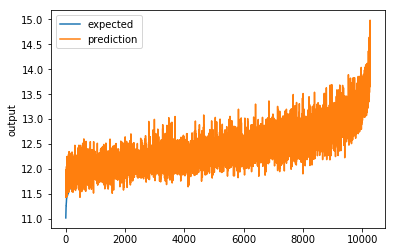

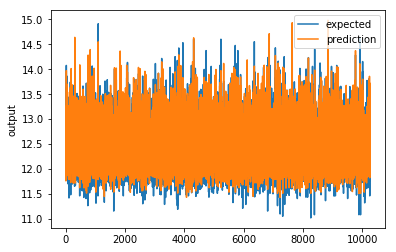

In [14]:
model2 = Sequential()
model2.add(Dense(40, input_dim=26, activation='relu'))
model2.add(Dense(70, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation = 'elu'))
model2.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weightsNew2.hdf5", verbose=0, save_best_only=True) # save best model
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=1000)
model.load_weights('best_weightsNew2.hdf5') # load weights from best model

# Predict and measure RMSE
y_predNN2 = model.predict(x_test)
score = numpy.sqrt(metrics.mean_squared_error(y_predNN2,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(y_predNN2.flatten(),y_test)
chart_regression(y_predNN2.flatten(),y_test,sort=False)

In [15]:
#Scores for NN model

#Compute the MAE
from sklearn.metrics import mean_absolute_error
print("This is the MAE:")
print(mean_absolute_error(y_test, y_predNN2))

#Compute the MSE
from sklearn.metrics import mean_squared_error
print("This is the MSE:")
print(mean_squared_error(y_test, y_predNN2))

#Compute the RMSE
print("The Following is the RMSE:")
print(numpy.sqrt(mean_squared_error(y_test, y_predNN2)))

#Compute the R^2 Score
from sklearn.metrics import r2_score
print("The Following is the R^2 Score:")
print(r2_score(y_test,y_predNN2))

This is the MAE:
0.1763466686093723
This is the MSE:
0.05115393255336574
The Following is the RMSE:
0.2261723514344
The Following is the R^2 Score:
0.7753729381088312


In [16]:
print(y_predNN2)

[[12.443722]
 [12.824389]
 [12.716552]
 ...
 [12.181062]
 [12.291388]
 [12.417188]]


In [17]:
print(y_pred2)

[12.47170019 12.72845745 12.63307428 ... 12.22683907 12.28098488
 12.31928682]


In [18]:
print(y_test)

[12.43320822 12.9598468  12.73080117 ... 12.17561344 12.28995413
 12.31043266]


In [22]:
df2 = pd.read_csv("get-plot-agehouse.csv") 
dataset2 = df2.values

X_age = dataset2[:,0:26]
Y_age = dataset2[:,27]

In [23]:
age_pred = lr.predict(X_age)

In [36]:
yname = ["u","ref", "1500+","1931+","1945+","1960+","1971+","1981+","1991+","2001+"]

Text(0.5, 1.0, 'Construction year and log-house price')

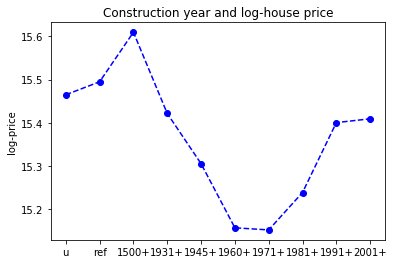

In [37]:
plt.plot(yname,age_pred,linestyle='--', marker='o', color='b')
plt.ylabel("log-price")
plt.title("Construction year and log-house price")
#plt.xlabel("year of construction, u = unknown, ref = reference/1906-1930")

In [63]:
cases=[]
for n in range(20):
    cases.append(str(n))
    

In [62]:
print(cases)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


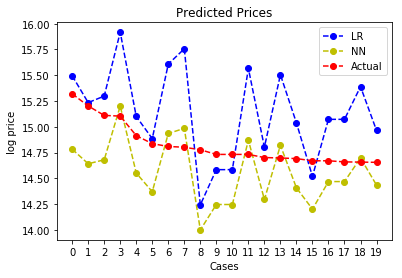

In [67]:
X_table_lr = lr.predict(X_table)
X_table_NN = model.predict(X_table)

plt.plot(cases,X_table_lr,linestyle='--', marker='o', color='b',label='LR')
plt.plot(cases,X_table_NN, linestyle='--', marker='o', color='y',label='NN')
plt.plot(cases,Y_table, linestyle='--', marker='o', color='r', label ='Actual')
plt.title('Predicted Prices')
plt.ylabel("log price")
plt.xlabel("Cases")
plt.legend()

In [69]:
for price in X_table_lr:
    print(price)


15.4949951171875
15.234375
15.2974853515625
15.9168701171875
15.099853515625
14.8851318359375
15.60791015625
15.7562255859375
14.2425537109375
14.583984375
14.583984375
15.5655517578125
14.8026123046875
15.5045166015625
15.037353515625
14.518798828125
15.072021484375
15.072021484375
15.3890380859375
14.9642333984375


In [70]:
for price in X_table_NN:
    print(price)

[14.782414]
[14.641139]
[14.679446]
[15.200257]
[14.550961]
[14.370049]
[14.934865]
[14.984293]
[13.999337]
[14.245799]
[14.245799]
[14.870002]
[14.294585]
[14.819451]
[14.407308]
[14.200945]
[14.468351]
[14.468351]
[14.697535]
[14.433842]


In [71]:
for price in Y_table:
    print(price)

15.3195879547405
15.201804919084198
15.110237725558699
15.1033648462709
14.914122846632399
14.8361613051627
14.8087623309746
14.801327352486998
14.7767746554812
14.7318012898384
14.7318012898384
14.7318012898384
14.7013420823537
14.6972098450688
14.690979295318199
14.6699258861203
14.6699258861203
14.659230597003601
14.6570777436425
14.6549202455025
